# less_chance_for_heart_attack

## Analyse des fonctionalités

### 1. Importation des bibliothèques adéquates

In [392]:

"""importe les bibliothèques adequoite """
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from IPython.display import clear_output
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import confusion_matrix #for confusion matrix
import sklearn.feature_extraction as feature_extraction
from sklearn.feature_extraction import DictVectorizer


### 2. Importation des données 

In [393]:
"""Ouvre le fichier attaque coeur."""
coeur = pd.read_csv('attaque_coeur.csv')

In [394]:
print(coeur)

     age sex  cp  trtbps  chol  fbs  restecg  thalachh exng  oldpeak  slp  \
0     63   M   3     145   233    1        0       150   no      2.3    0   
1     37   M   2     130   250    0        1       187   no      3.5    0   
2     41   F   1     130   204    0        0       172   no      1.4    2   
3     56   M   1     120   236    0        1       178   no      0.8    2   
4     57   F   0     120   354    0        1       163  yes      0.6    2   
..   ...  ..  ..     ...   ...  ...      ...       ...  ...      ...  ...   
298   57   F   0     140   241    0        1       123  yes      0.2    1   
299   45   M   3     110   264    0        1       132   no      1.2    1   
300   68   M   0     144   193    1        1       141   no      3.4    1   
301   57   M   0     130   131    0        1       115  yes      1.2    1   
302   57   F   1     130   236    0        0       174   no      0.0    1   

     caa  thall       output  
0      0      1  more chance  
1      0     

<font color='grey'> comprend ``303 lignes`` et ``14 columns``.</font>

In [395]:
coeur.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance
5,57,M,0,140,192,0,1,148,no,0.4,1,0,1,more chance
6,56,F,1,140,294,0,0,153,no,1.3,1,0,2,more chance
7,44,M,1,120,263,0,1,173,no,0.0,2,0,3,more chance
8,52,M,2,172,199,1,1,162,no,0.5,2,0,3,more chance
9,57,M,2,150,168,0,1,174,no,1.6,2,0,2,more chance


In [396]:
coeur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


<font color='grey'> On remarque ici que les données sont de type ``float64(1)``, ``int64(10)`` et ``str64(3)``. </font>

In [397]:
coeur.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


<font color='grey'> on remarque que l'``âge`` est ``diversifier``. de ``29`` ans à ``77`` ans. la ``majorité`` est d'``âge mure``.</font>  

### 3. Voir s’il y a des valeurs manquantes

In [398]:
"""Détecte les valeurs manquantes pour un objet de type tableau."""
coeur.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<font color= 'grey'> On remarque ici que les données n'ont pas de valeur manquante. Copions notre data et emportons la copie dans laquelle nous avons enlevé quelque valeurs et faisons une deuxième copie dans le notebook. </font>

importation d'une copie ``csv`` avec quelque valeur manquantes.

In [399]:
"""Ouvre le nouveau fichier et fait une copie"""
coeur_2 = pd.read_csv('coeur.csv')
"""Copie des données."""
from copy import deepcopy
coeur_3 = deepcopy(coeur_2)

In [400]:

coeur_2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1.0,NaN,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,NaN,1.0,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,NaN,0.0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0.0,1.0,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0.0,1.0,163,yes,0.6,2,0,2,more chance


In [401]:
"""recherche annomalie dans les données de f_coeur2."""
coeur_2.isnull().head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<font color= 'grey'> nous remarquons que dans ce fichier, quelque valeurs manquent. suprimons les lignes des valeurs manquantes.</font> 

### 4.1 Suppression des lignes contenant des valeurs manquantes  (dropna)

In [402]:
"""suprime les lignes contenant des valeurs manquantes """
coeur_2.dropna()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
3,56,M,1,120,236,0.0,1.0,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0.0,1.0,163,yes,0.6,2,0,2,more chance
5,57,M,0,140,192,0.0,1.0,148,no,0.4,1,0,1,more chance
6,56,F,1,140,294,0.0,0.0,153,no,1.3,1,0,2,more chance
8,52,M,2,172,199,1.0,1.0,162,no,0.5,2,0,3,more chance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,0,140,241,0.0,1.0,123,yes,0.2,1,0,3,less chance
299,45,M,3,110,264,0.0,1.0,132,no,1.2,1,0,3,less chance
300,68,M,0,144,193,1.0,1.0,141,no,3.4,1,2,3,less chance
301,57,M,0,130,131,0.0,1.0,115,yes,1.2,1,1,3,less chance


<font color= 'grey'> Nous remarquons dans ce cas si, les lignes 1,2,3, ont disparu du tableau.donc le nettoyage a marché.</font>

In [403]:
"""affichange de notre copie avec les données manquantes."""
coeur_3.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1.0,NaN,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,NaN,1.0,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,NaN,0.0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0.0,1.0,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0.0,1.0,163,yes,0.6,2,0,2,more chance


<font color='grey'> Apparition de quelques strings sur le tabeau. </font>

### 4.2 transformation des valeurs manquantes (SimpleImputer)

<font color= 'grey'> Utilisons notre copie précédament créer.</font>

<font color='grey'> Transformons ces valeurs avec ``SimpleImputer``. </font>

In [404]:
"""Transforme les valeurs manquantes en chiffre"""
Sim=SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = Sim.fit(coeur_3)
coeur_3_sans_nan = pd.DataFrame(Sim.transform(coeur_3.loc[:,:]))
columns = coeur_3.columns
coeur_3_sans_nan.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,M,3,145,233,1.0,1.0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0.0,1.0,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0.0,0.0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0.0,1.0,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0.0,1.0,163,yes,0.6,2,0,2,more chance
5,57,M,0,140,192,0.0,1.0,148,no,0.4,1,0,1,more chance
6,56,F,1,140,294,0.0,0.0,153,no,1.3,1,0,2,more chance
7,44,M,1,120,263,0.0,1.0,173,no,0.0,2,0,3,more chance
8,52,M,2,172,199,1.0,1.0,162,no,0.5,2,0,3,more chance
9,57,M,2,150,168,0.0,1.0,174,no,1.6,2,0,2,more chance


In [405]:
"""utilise la copie des données """
coeur_3_sans_nan.info()
coeur_3_sans_nan.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       303 non-null    object
 1   1       303 non-null    object
 2   2       303 non-null    object
 3   3       303 non-null    object
 4   4       303 non-null    object
 5   5       303 non-null    object
 6   6       303 non-null    object
 7   7       303 non-null    object
 8   8       303 non-null    object
 9   9       303 non-null    object
 10  10      303 non-null    object
 11  11      303 non-null    object
 12  12      303 non-null    object
 13  13      303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,57,F,0,140,241,0.0,1.0,123,yes,0.2,1,0,3,less chance
299,45,M,3,110,264,0.0,1.0,132,no,1.2,1,0,3,less chance
300,68,M,0,144,193,1.0,1.0,141,no,3.4,1,2,3,less chance
301,57,M,0,130,131,0.0,1.0,115,yes,1.2,1,1,3,less chance
302,57,F,1,130,236,0.0,0.0,174,no,0.0,1,1,2,less chance


In [406]:
coeur_3_sans_nan.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303,303,303,303,303,303.0,303.0,303,303,303.0,303,303,303,303
unique,41,2,4,49,152,2.0,3.0,91,2,40.0,3,5,4,2
top,58,M,0,120,204,0.0,1.0,162,no,0.0,2,0,2,more chance
freq,19,207,143,37,6,258.0,153.0,11,204,99.0,142,175,166,165


### 5. Encodage des valeurs catégoriques (LabelEncoder)

In [407]:
"""Transforme les lettres en chiffres"""
le = preprocessing.LabelEncoder()
"""Transforme string en int."""
le.fit(["F", 0,"M", 1, "no", 0,"yes",1,"less chance",0, "more chance", 1])
coeur.output=le.fit_transform(coeur.output)
coeur.sex =le.fit_transform(coeur.sex)
coeur.exng=le.fit_transform(coeur.exng)
print(coeur.sex)
print(coeur.output)
print(coeur.exng)

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64
0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exng, Length: 303, dtype: int64


In [408]:
print(coeur.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


## 6. Visualisation et analyse de données : Distribution, corrélations, outliers

### 6.1 Dustribution

In [409]:
coeur_num = coeur.select_dtypes(include = [ 'int64'])
"""Transforme les données en float et int"""
coeur_num.sum()

age         16473
sex           207
cp            293
trtbps      39882
chol        74618
fbs            45
restecg       160
thalachh    45343
exng           99
slp           424
caa           221
thall         701
output        165
dtype: int64

In [410]:
print(len(coeur_num))
print(coeur_num)

303
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  slp  caa  \
0     63    1   3     145   233    1        0       150     0    0    0   
1     37    1   2     130   250    0        1       187     0    0    0   
2     41    0   1     130   204    0        0       172     0    2    0   
3     56    1   1     120   236    0        1       178     0    2    0   
4     57    0   0     120   354    0        1       163     1    2    0   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...  ...  ...   
298   57    0   0     140   241    0        1       123     1    1    0   
299   45    1   3     110   264    0        1       132     0    1    0   
300   68    1   0     144   193    1        1       141     0    1    2   
301   57    1   0     130   131    0        1       115     1    1    1   
302   57    0   1     130   236    0        0       174     0    1    1   

     thall  output  
0        1       1  
1        2       1  
2        2       1  
3        2 

In [411]:
pd.crosstab(coeur_num.sex,coeur_num.output,margins=True).style.background_gradient(cmap='summer_r')

output,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


ici on remarque que SUR 207 hommes 93 risquent d'avoir une attaque cardiaque, tandisque chez les femmes, 72 sur 96. Au total sur303 personnes, 165 personne ont plus de risques d'avoir une attaque cardiaque.

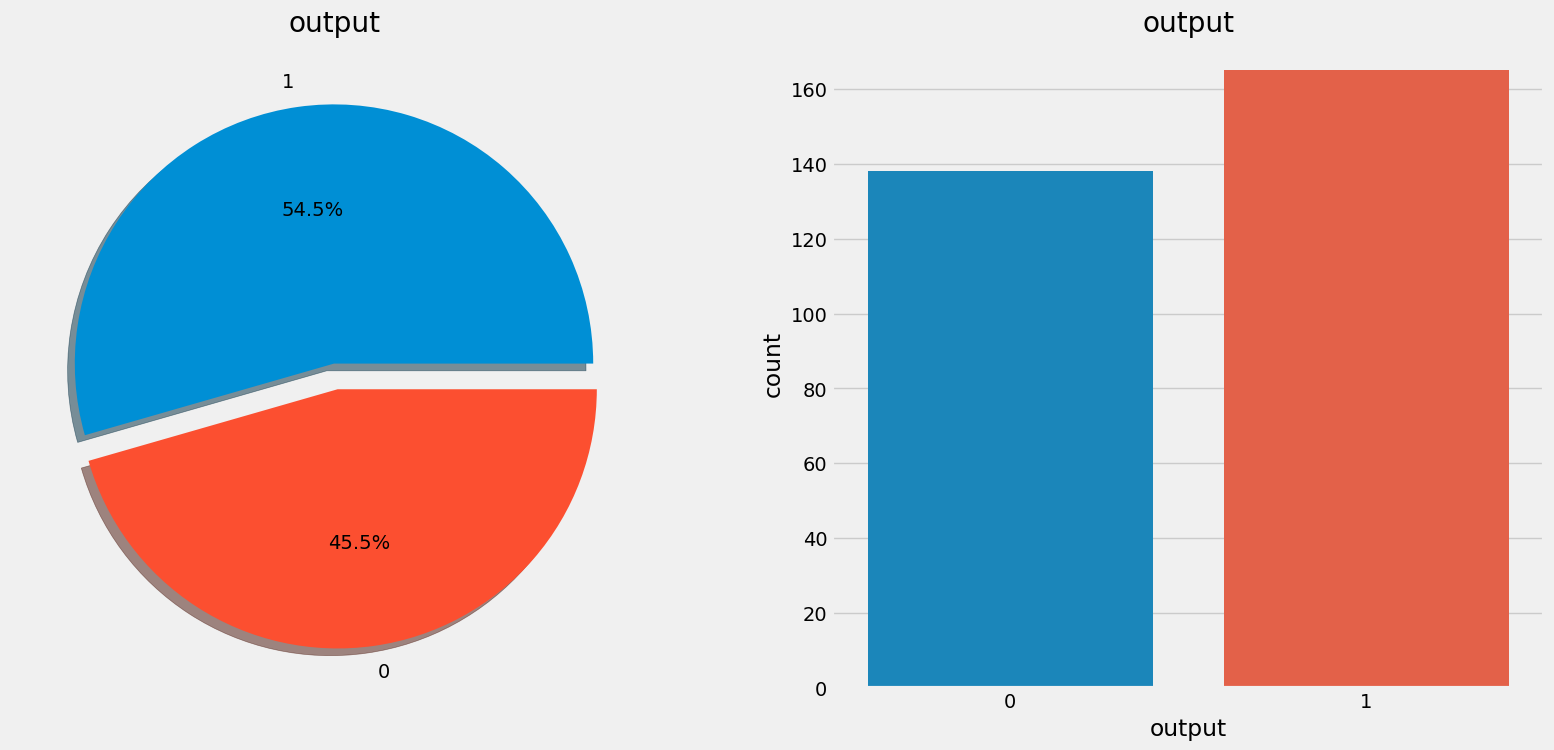

In [412]:
#données groupées des deux sex sur les risques d'avoir une attaque cardiaque.
f,ax=plt.subplots(1,2,figsize=(18,8))
coeur_num['output'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('output')
ax[0].set_ylabel('')
sns.countplot(data=coeur_num, x='output', ax=ax[1])
ax[1].set_title('output')
plt.show()

sur ce graphisme, on remarque que 54.5% de la population à plus de risque d'avoir une attaque cardiaque.

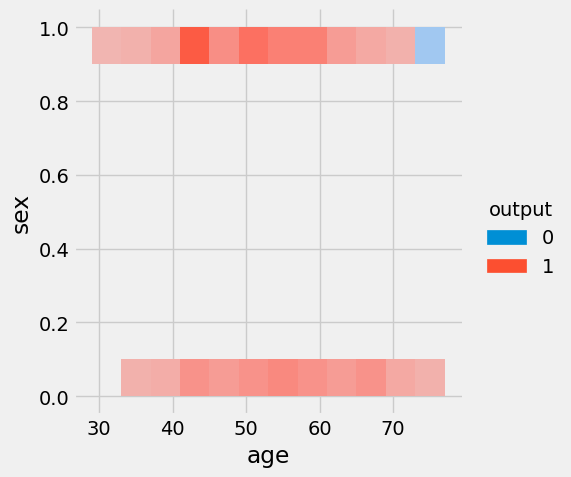

In [413]:
"""crée un graphique sur le taux de risque d'attaque cardiaque chez la femme et chez l'homme ainsi que par rapport à leur age."""
sns.displot(coeur_num, x = "age", y = "sex", hue = "output")

<font color = 'grey'> On remarque sur ce graphique que le risque d'attaque cardiaque commence très tôt chez les hommes(``vers les 29 ans``) par rapport aux femmes qui apparait un peu plus tard (``32 ans``).</font>  
<font color ='grey'>Chez les hommes, la periode la plus risquer se situ entre ``entre 41 et 45 ANS``. On remarque sur ce graphique, que les hommes ont moins de risque à partir de 74 ans .</font>   
<font color ='grey'>Chez la femme c'est un peu plus intense par rapport au hommes. Le risque d'attaque cardiaque début ``vers les 32 ANS`` jusqu'à ces 78 ans.</font>

<AxesSubplot: ylabel='Count'>

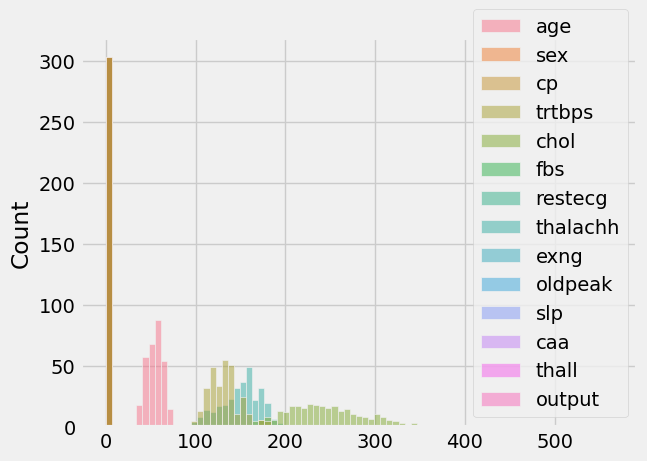

In [414]:
sns.histplot(data=coeur)

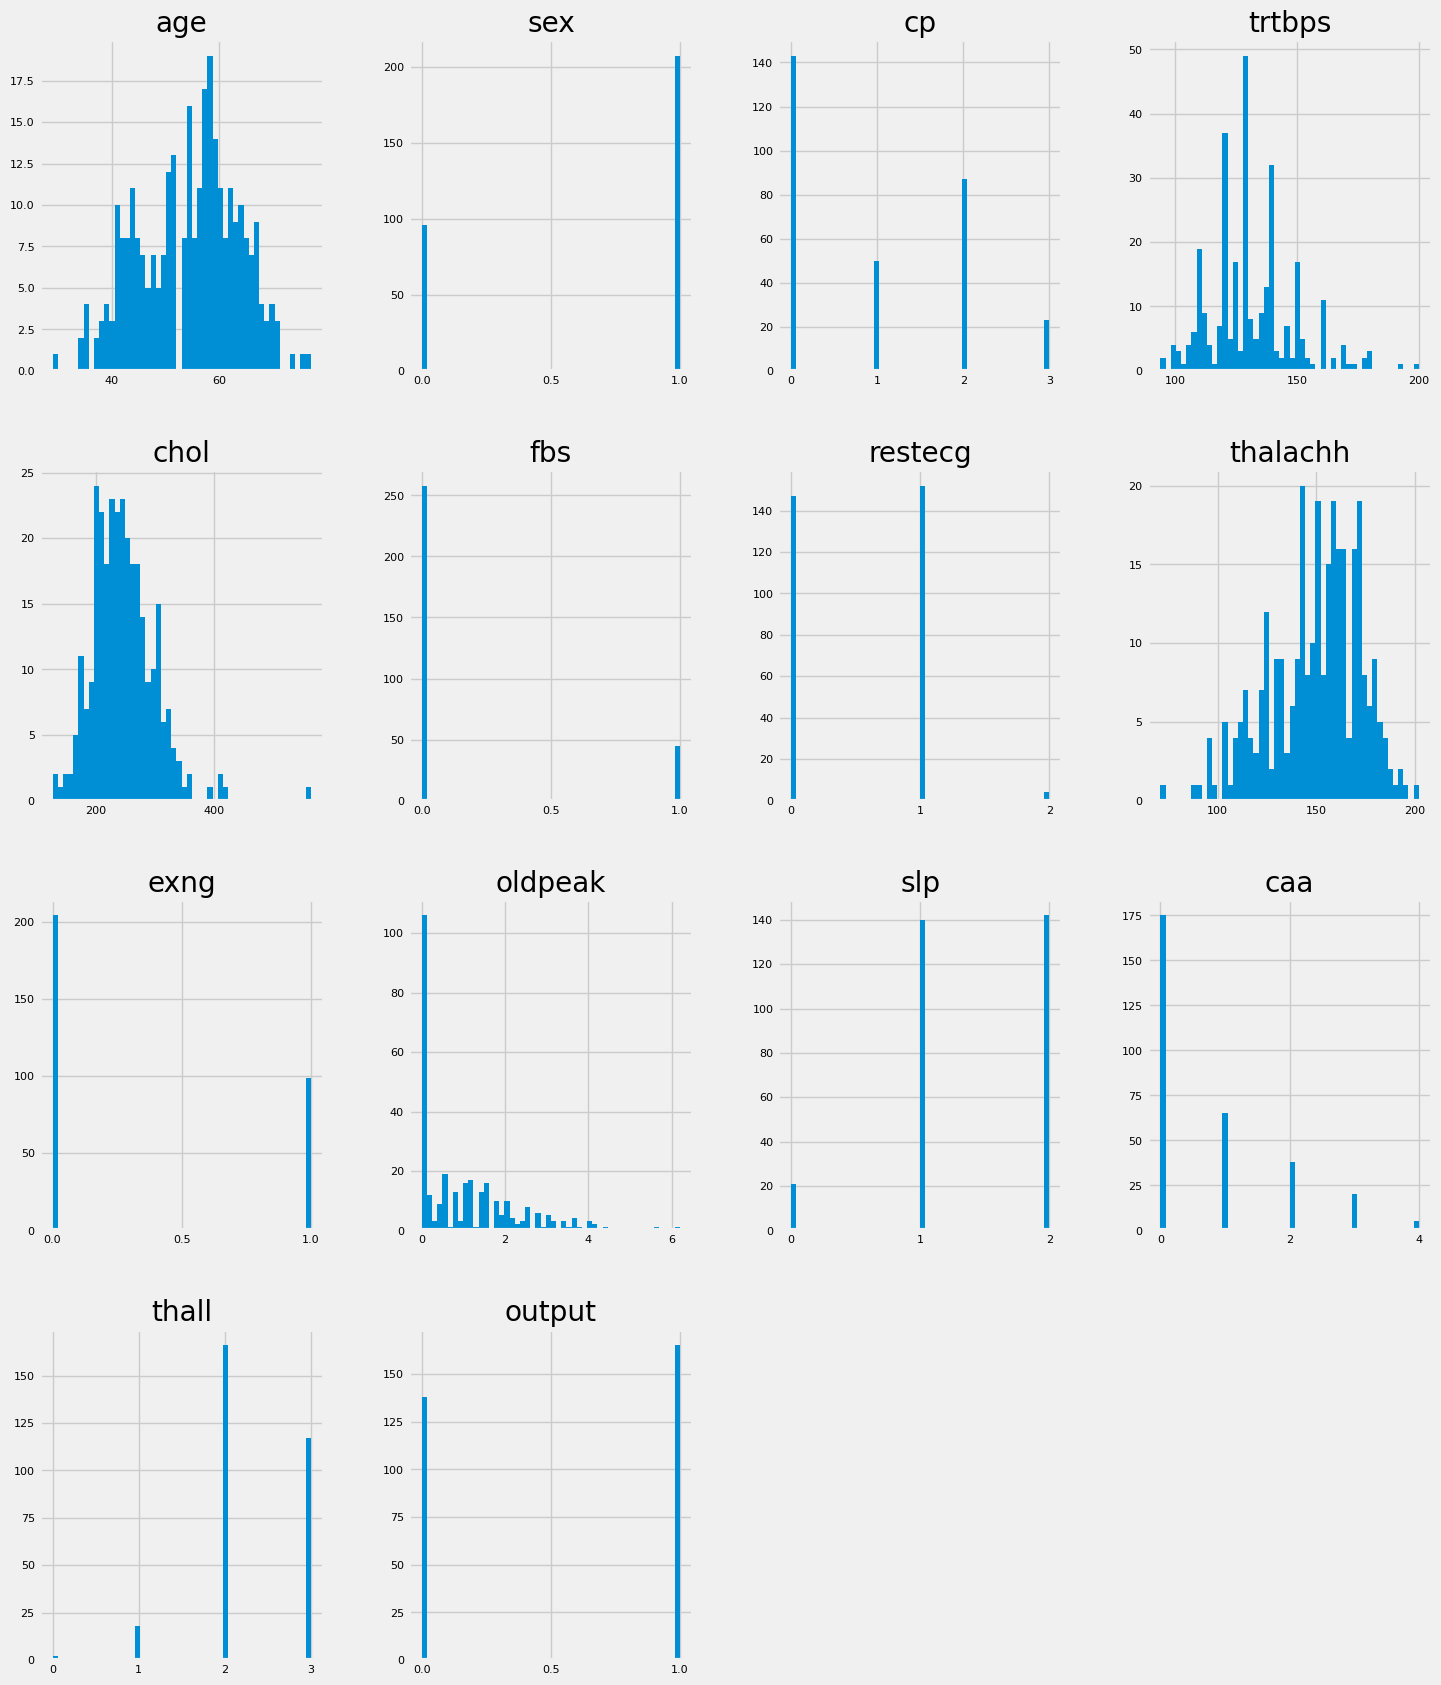

In [415]:
"""création des graphismes sur toutes les colonnes des données."""
coeur.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, );

<font color ='grey'> on remarque ici que au niveau des sex, le pourcentage des hommes est deux fois plus importante que chez les femmes.</font>

### Corrélation

In [416]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = coeur["sex"]
data2 = coeur["output"]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.281


In [417]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(2)
# prepare data
data1 = coeur["age"]
data2 = coeur["output"]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.225


<AxesSubplot: >

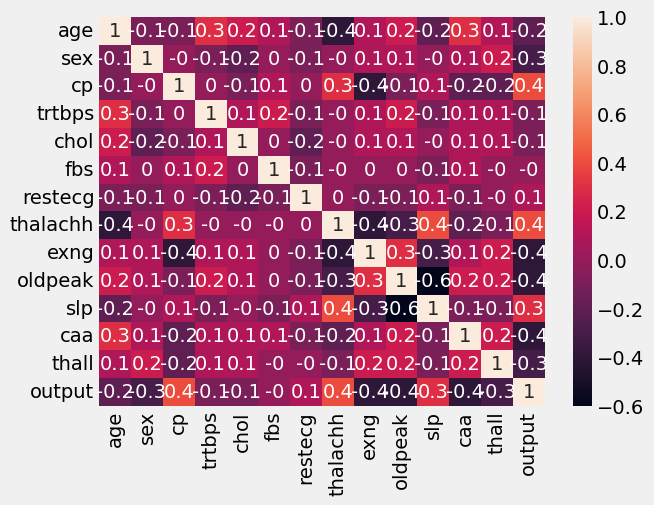

In [418]:
	
#etude de la correlation
matrice_corr = coeur.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

Une correlation entre exng(0.3) et oldpeak(0.3)

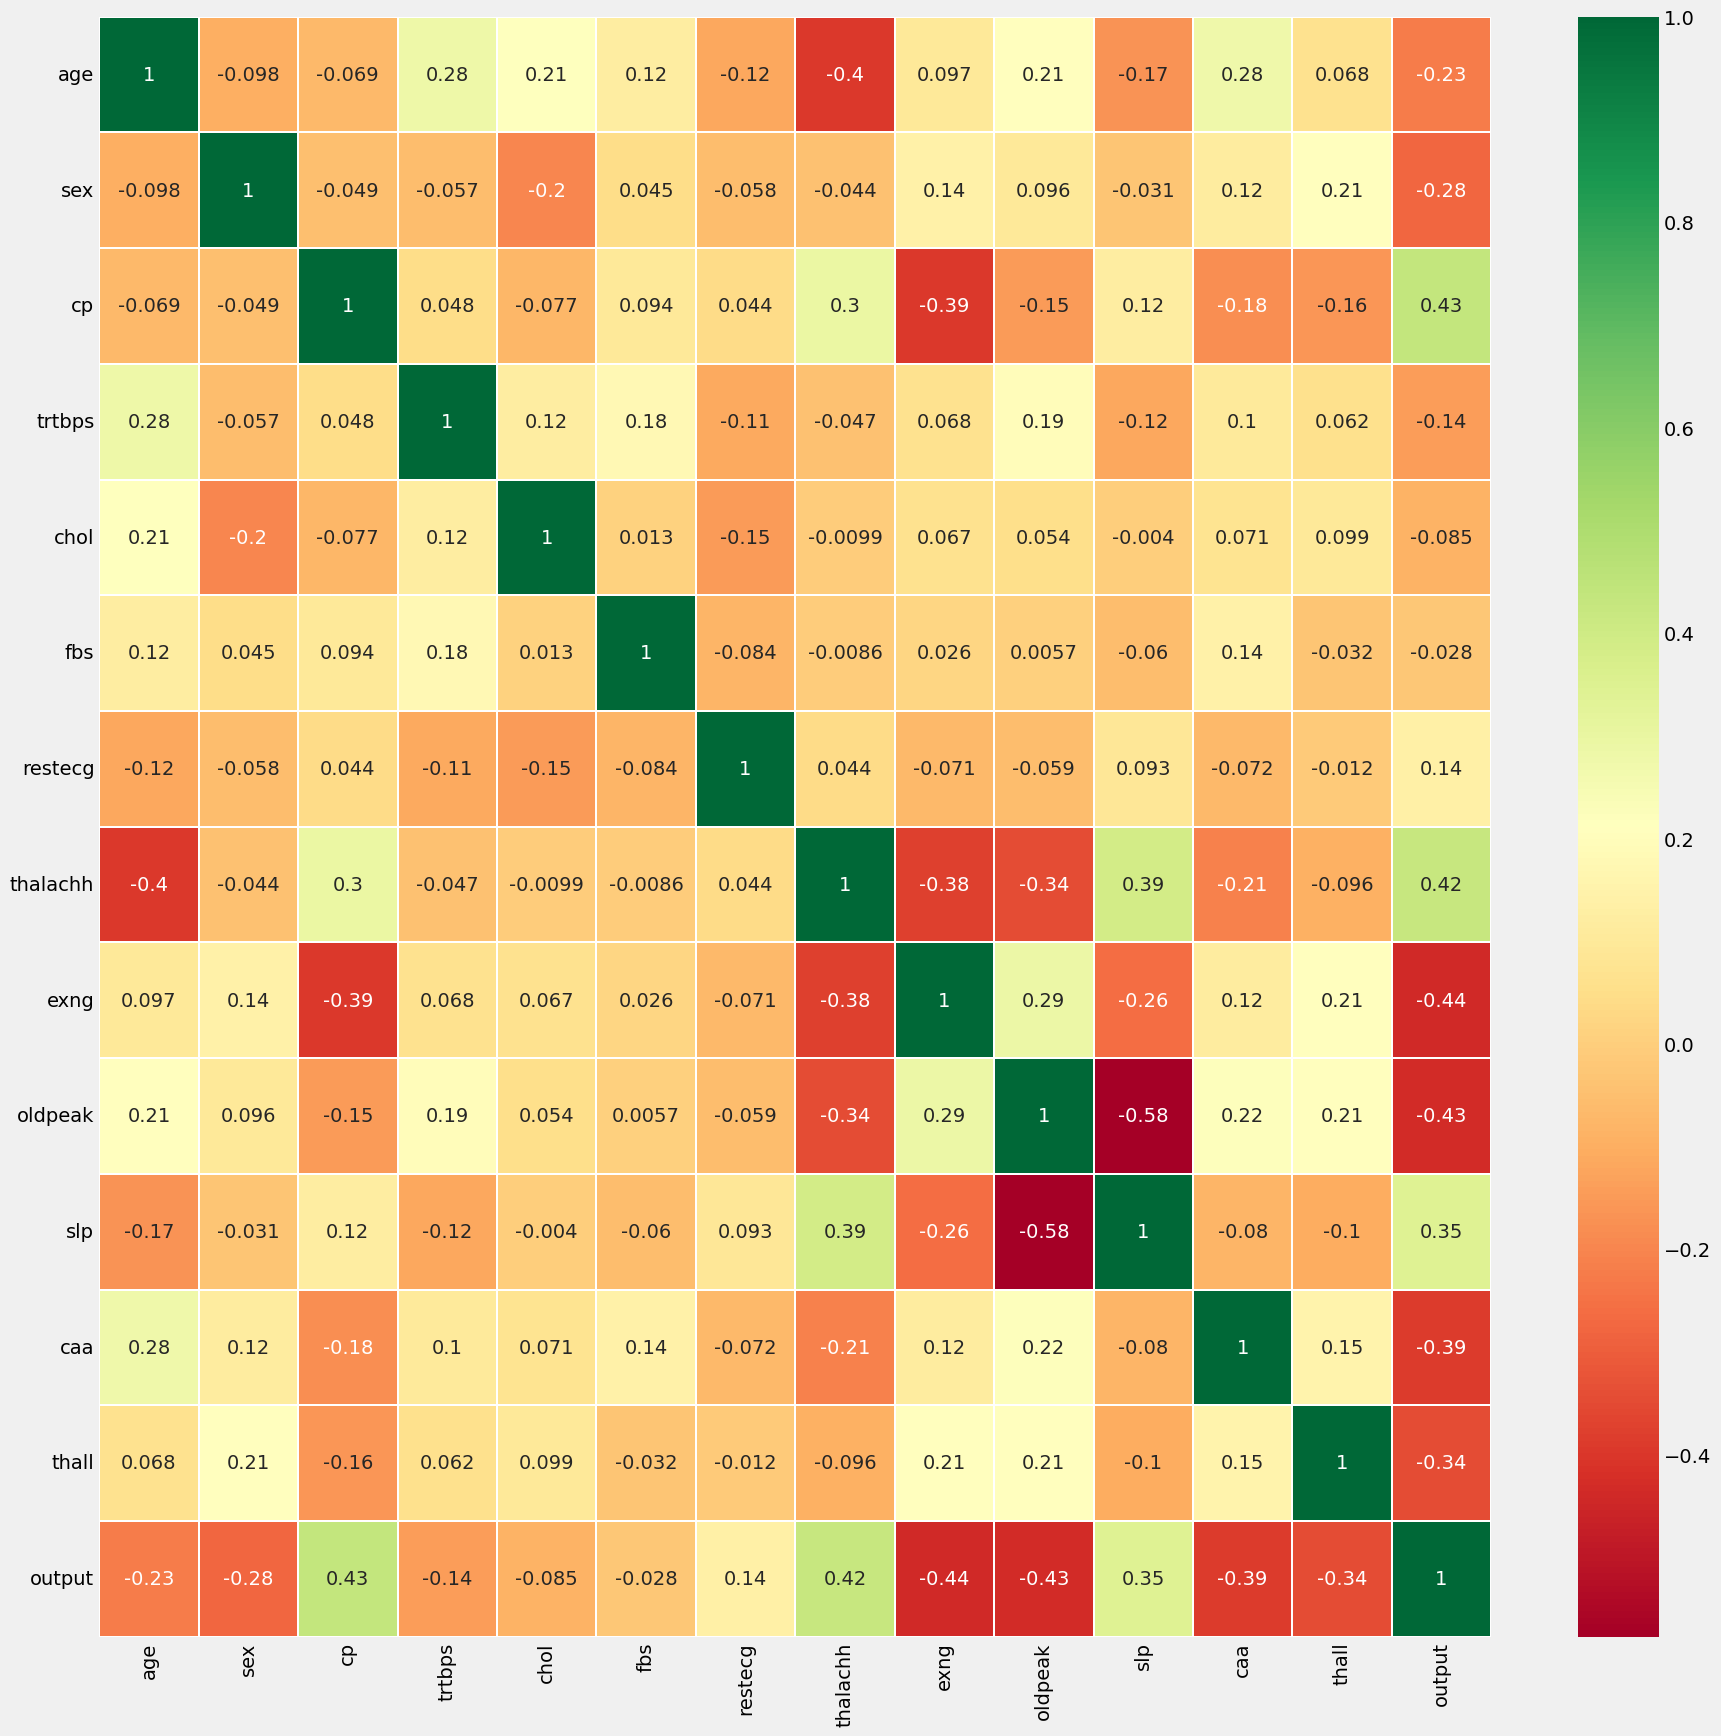

In [419]:
sns.heatmap(coeur.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
"""Correlation matrice"""
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

<font color='grey'>partir de la carte thermique ci-dessus, nous pouvons voir que les caractéristiques ne sont pas beaucoup corrélées. La corrélation la plus élevée est entre ``eng et oldpeak, soit 0,29`` et la moins élevée est entre ``oldpeak et slp, soit -0.53``. Nous pouvons donc continuer avec toutes les caractéristiques.</font>

<font color='grey'>Now the above correlation plot, we can see some positively related features. Some of them being ``SibSp andd Family_Size`` and ``Parch and Family_Size`` and some negative ones like ``Alone and Family_Size.``</font>

In [420]:
def outlier_treatment(sort_coeur):
    sorted(sort_coeur)
    Q1,Q2 = np.percentile(sort_coeur , [12,13])
    IQR = Q2 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q2 + (1.5 * IQR)

    lowerbound,upperbound = outlier_treatment(coeur.age)
    coeur[(coeur.age < lowerbound) | (coeur.age > upperbound)]
    coeur_out =coeur.drop(coeur[ (coeur.chol > upperbound) | (coeur.chol < lowerbound) ].index , inplace=True)
    print(coeur_out)
    return lower_range,upper_range


#### CONCLUSION


<font color = 'grey'> D'après les données étudiées ici, on remarque que les hommes sont ``deux fois plus nombreux ``que les femmes et ils sont plus de chance de ne pas avoir d'attaque cardiaque qui se minimise à partir de ``74 ans``. Tandis que chez la femmes ils commences un peu plus tard`` 32 ans jusqu'à 74 ans``.</font>

In [421]:
#on utilise seulement 4 variables explicatives
X =pd.DataFrame(np.c_[coeur['age'], coeur['sex'], coeur['cp'],coeur['chol']], columns = ['age','sex','cp','chol'])
Y = coeur['output'],
print(X)
# #base d'apprentissage et base de test

train,test=train_test_split(coeur,test_size=0.3,random_state=0,stratify=coeur['output'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=coeur[coeur.columns[1:]]
Y=coeur['output']

     age  sex  cp  chol
0     63    1   3   233
1     37    1   2   250
2     41    0   1   204
3     56    1   1   236
4     57    0   0   354
..   ...  ...  ..   ...
298   57    0   0   241
299   45    1   3   264
300   68    1   0   193
301   57    1   0   131
302   57    0   1   236

[303 rows x 4 columns]


In [422]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


In [423]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lmodellineaire = LinearRegression()
lmodellineaire.fit(train_X,train_Y)

LinearRegression()

In [424]:

Q1 = np.percentile(coeur, 25, interpolation = 'midpoint')
Q2 = np.percentile(coeur, 50, interpolation = 'midpoint')
#Q3 = np.percentile(so_coeur, 75, interpolation = 'midpoint') 


print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
#print('Q1 75 percentile of the given data is, ', Q3)

Q1 25 percentile of the given data is,  0.0
Q1 50 percentile of the given data is,  1.0


Fractionner le jeu de données pour l’entrainement et le test (voir sklearn.model_selection.train_test_split Training and Test set).

In [425]:
#on utilise seulement 4 variables explicatives
X =pd.DataFrame(np.c_[coeur['age'], coeur['sex'], coeur['cp'],coeur['chol']], columns = ['age','sex','cp','chol'])
Y = coeur['output'],
print(X)
# #base d'apprentissage et base de test

train,test=train_test_split(coeur,test_size=0.3,random_state=0,stratify=coeur['output'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=coeur[coeur.columns[1:]]
Y=coeur['output']

     age  sex  cp  chol
0     63    1   3   233
1     37    1   2   250
2     41    0   1   204
3     56    1   1   236
4     57    0   0   354
..   ...  ...  ..   ...
298   57    0   0   241
299   45    1   3   264
300   68    1   0   193
301   57    1   0   131
302   57    0   1   236

[303 rows x 4 columns]


In [426]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [427]:
from sklearn import metrics
scores = cross_val_score(
clf, X, Y, cv=5, scoring='f1_macro')
scores

array([1., 1., 1., 1., 1.])

In [428]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, Y, cv=cv)


array([1., 1., 1., 1., 1.])

In [429]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

1.0

In [430]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, Y, cv=cv)

array([1., 1., 1., 1., 1.])

In [431]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, Y, scoring=scoring)
sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
scores['test_recall_macro']

array([1., 1., 1., 1., 1.])

In [432]:
from sklearn.metrics import make_scorer
scoring = {'prec_macro': 'precision_macro',
        'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, X, Y, scoring=scoring,
                    cv=5, return_train_score=True)
sorted(scores.keys())
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro',
 'train_prec_macro', 'train_rec_macro']
scores['train_rec_macro']

array([1., 1., 1., 1., 1.])

In [433]:
scores = cross_validate(clf, X, Y,
scoring='precision_macro', cv=5,
return_estimator=True)
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

In [434]:
import numpy as np
from sklearn.model_selection import KFold

x = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(x):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [435]:
x = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]

In [436]:
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, StratifiedGroupKFold
import numpy as np
x, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(x, y):
    print('train -  {}   |   test -  {}'.format(
    np.bincount(y[train]), np.bincount(y[test])))
kf = KFold(n_splits=3)
for train, test in kf.split(x, y):
    print('train -  {}   |   test -  {}'.format(
    np.bincount(y[train]), np.bincount(y[test])))

train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


In [437]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.03296703296703297


La précision de la régression logistique est de 3%

In [438]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.06593406593406594


La précision de l'arbre de décision est de 4%

In [439]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.03296703296703297


La précision du KNN est de 3%

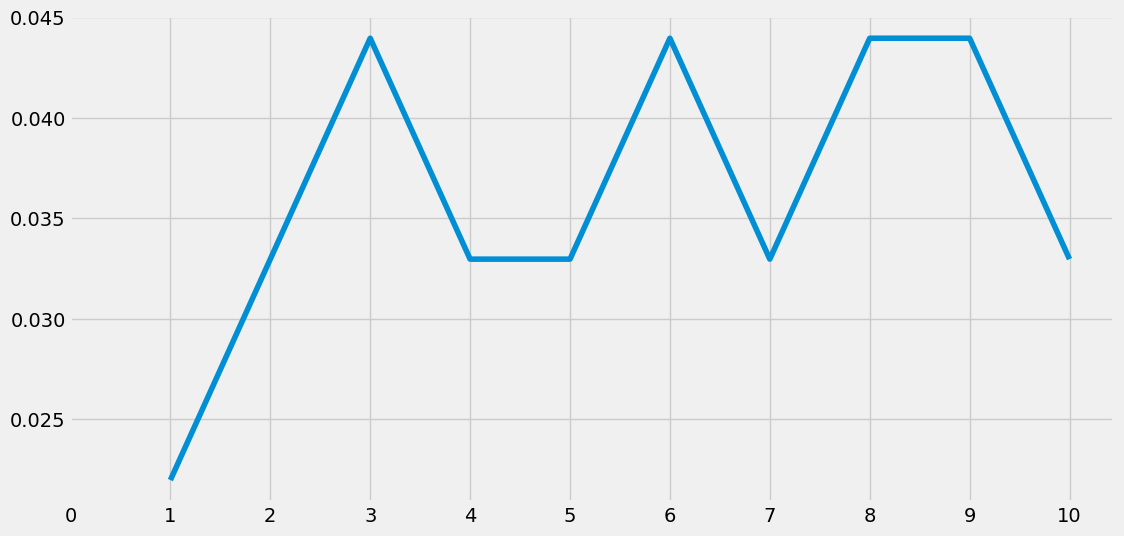

Accuracies for different values of n are: [0.02197802 0.03296703 0.04395604 0.03296703 0.03296703 0.04395604
 0.03296703 0.04395604 0.04395604 0.03296703] with the max value as  0.04395604395604396


In [440]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [441]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.06593406593406594


La précision des NaiveBayes est de 6%

In [442]:
model=RandomForestClassifier(n_estimators=303)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.06593406593406594


La précision des Random Forests  est de 6%

In [443]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10,shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=4),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=50)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,1.000000,0.000000
Radial Svm,0.643871,0.078512
Logistic Regression,1.000000,0.000000
KNN,0.610215,0.064499
Decision Tree,1.000000,0.000000
Naive Bayes,1.000000,0.000000
Random Forest,1.000000,0.000000


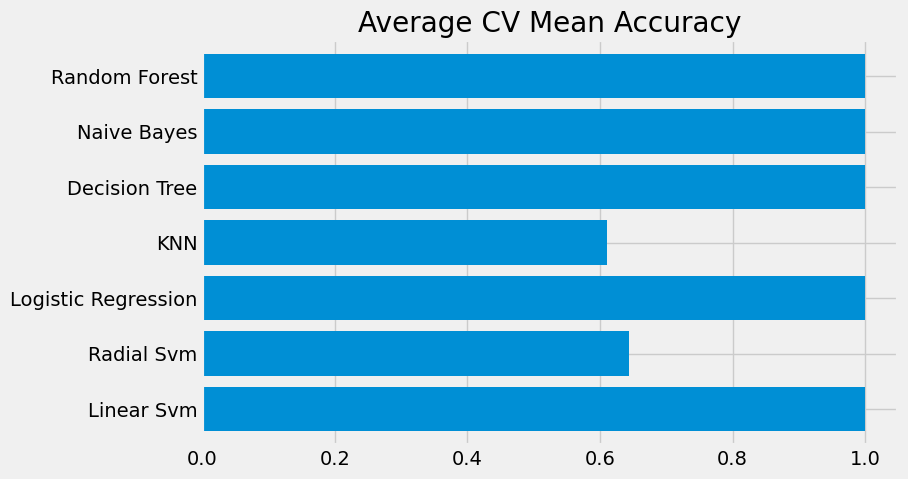

In [444]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

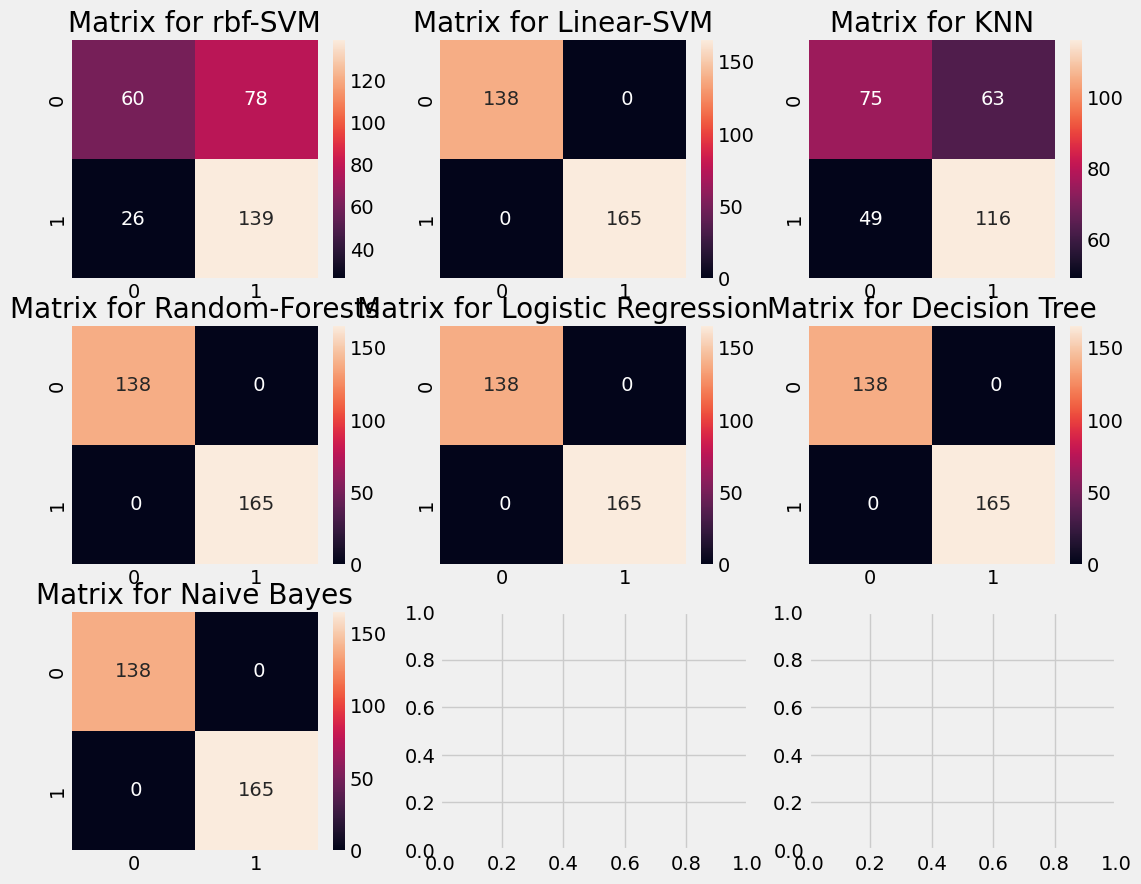

In [445]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [446]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
1.0
SVC(C=0.05, gamma=0.1, kernel='linear')


In [447]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
1.0
RandomForestClassifier(random_state=0)


In [448]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=50,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.06593406593406594
The cross validated score is 1.0


In [449]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.02197802197802198
The cross validated score for bagged KNN is: 0.6372043010752688


In [450]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.02197802197802198
The cross validated score for bagged Decision Tree is: 1.0


In [451]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 1.0


In [452]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 1.0


In [453]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 1.0


In [454]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
1.0
AdaBoostClassifier(learning_rate=0.05, n_estimators=100)


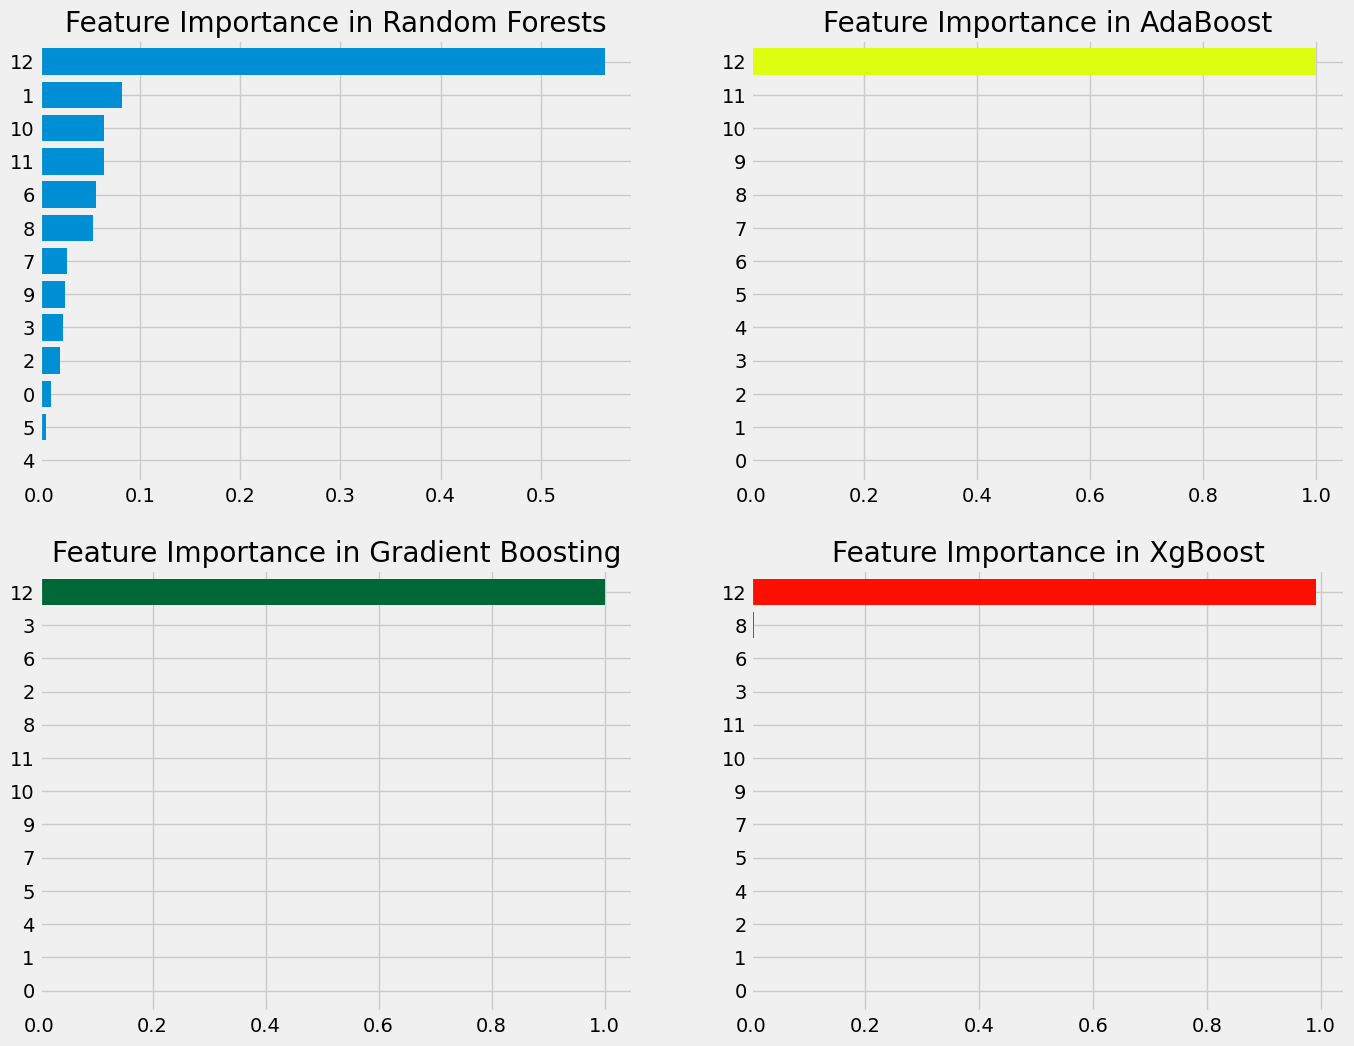

In [460]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

In [464]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X,Y))
print(scaler.mean_)

StandardScaler()
[6.83168317e-01 9.66996700e-01 1.31623762e+02 2.46264026e+02
 1.48514851e-01 5.28052805e-01 1.49646865e+02 3.26732673e-01
 1.03960396e+00 1.39933993e+00 7.29372937e-01 2.31353135e+00
 5.44554455e-01]


In [466]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X,Y))
print(scaler.data_max_)


MinMaxScaler()
[  1.    3.  200.  564.    1.    2.  202.    1.    6.2   2.    4.    3.
   1. ]


In [467]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
transformer
transformer.transform(X)

array([[ 0.  ,  1.  ,  0.75, ...,  0.  , -1.  ,  0.  ],
       [ 0.  ,  0.5 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  , -0.5 ,  0.7 , ...,  2.  ,  1.  , -1.  ],
       [ 0.  , -0.5 ,  0.  , ...,  1.  ,  1.  , -1.  ],
       [-1.  ,  0.  ,  0.  , ...,  1.  ,  0.  , -1.  ]])

# MERCI